Hoja de trabajo sheet 2.1

Presentado por Alisson, julio y Leonardo.

Ejercicio 1
> Use sklearn.tree.plot_tree to show the structure of a decision tree on iris, wine, digits, and breast cancer once for entropy and once for gini index as split criterion (8 plots in total).
The trees should be nicely readable if they have less than 20 elements. Are trees systematically smaller for one of the two criteria?

> Respuesta: No, el tamaño de los árboles de decisión no depende necesariamente del criterio de división utilizado, ya sea Gini o entropía. El tamaño del árbol de decisión está determinado por varios factores, como la complejidad del problema, la cantidad y calidad de los datos disponibles, los hiperparámetros seleccionados para el algoritmo de construcción del árbol y el criterio de parada utilizado. Tanto Gini como entropía son medidas de impureza o aleatoriedad en los datos, y ambos pueden usarse como criterios de división para los árboles de decisión. Sin embargo, pueden llevar a divisiones y estructuras de árboles diferentes. Gini tiende a ser más sensible a las clases principales, mientras que la entropía considera todas las clases por igual. En la práctica, la elección del criterio de división puede depender de las características específicas de los datos y los objetivos del análisis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_wine, load_digits, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
# Load and process datasets
datasets = {
  'iris': load_iris(),
  'wine': load_wine(),
  'digits': load_digits(),
  'breast_cancer': load_breast_cancer()
}

In [3]:
# Define the split criterions
criterions = ["entropy", "gini"]

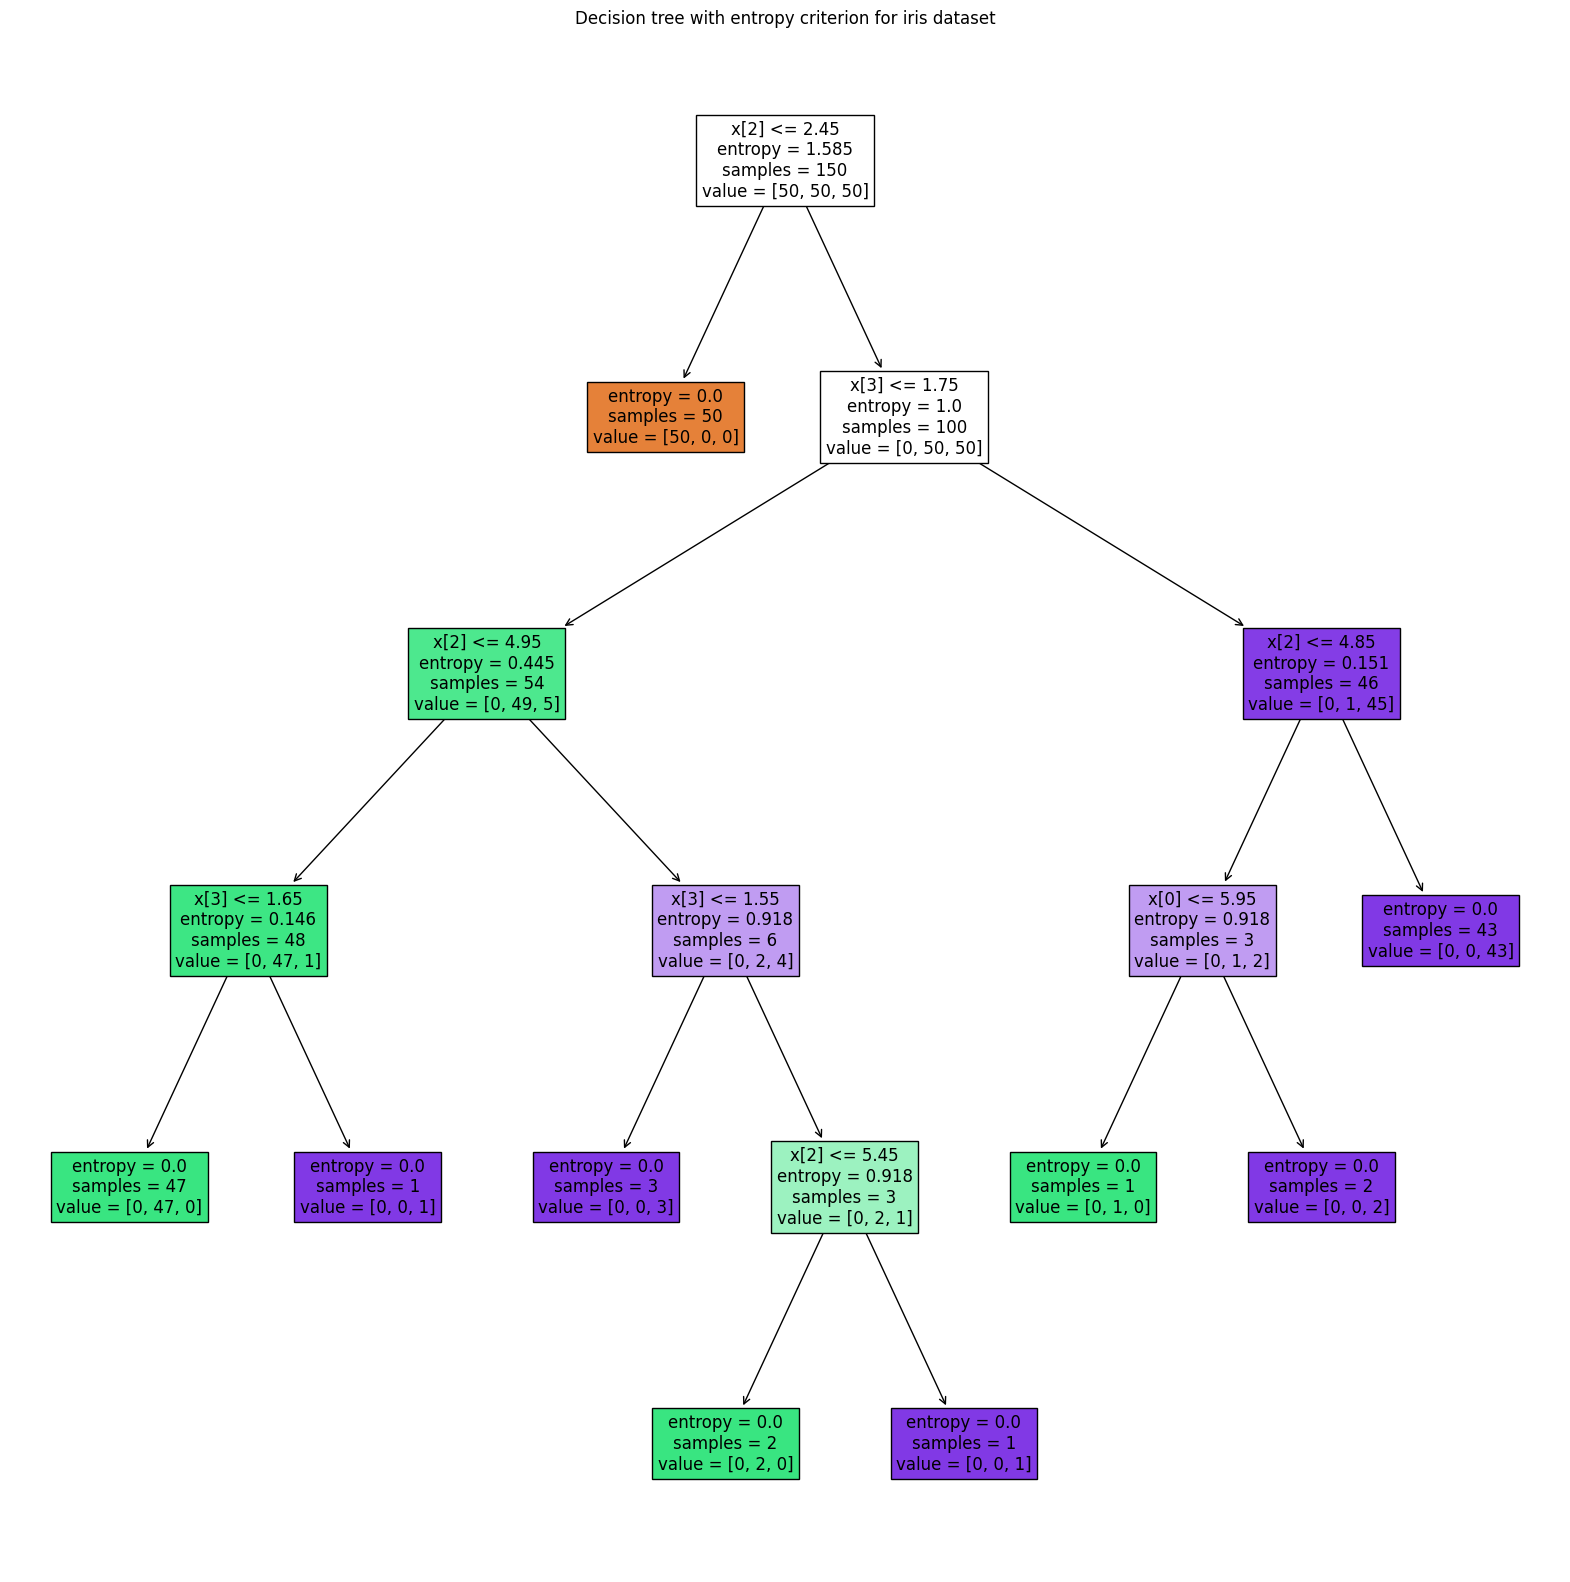

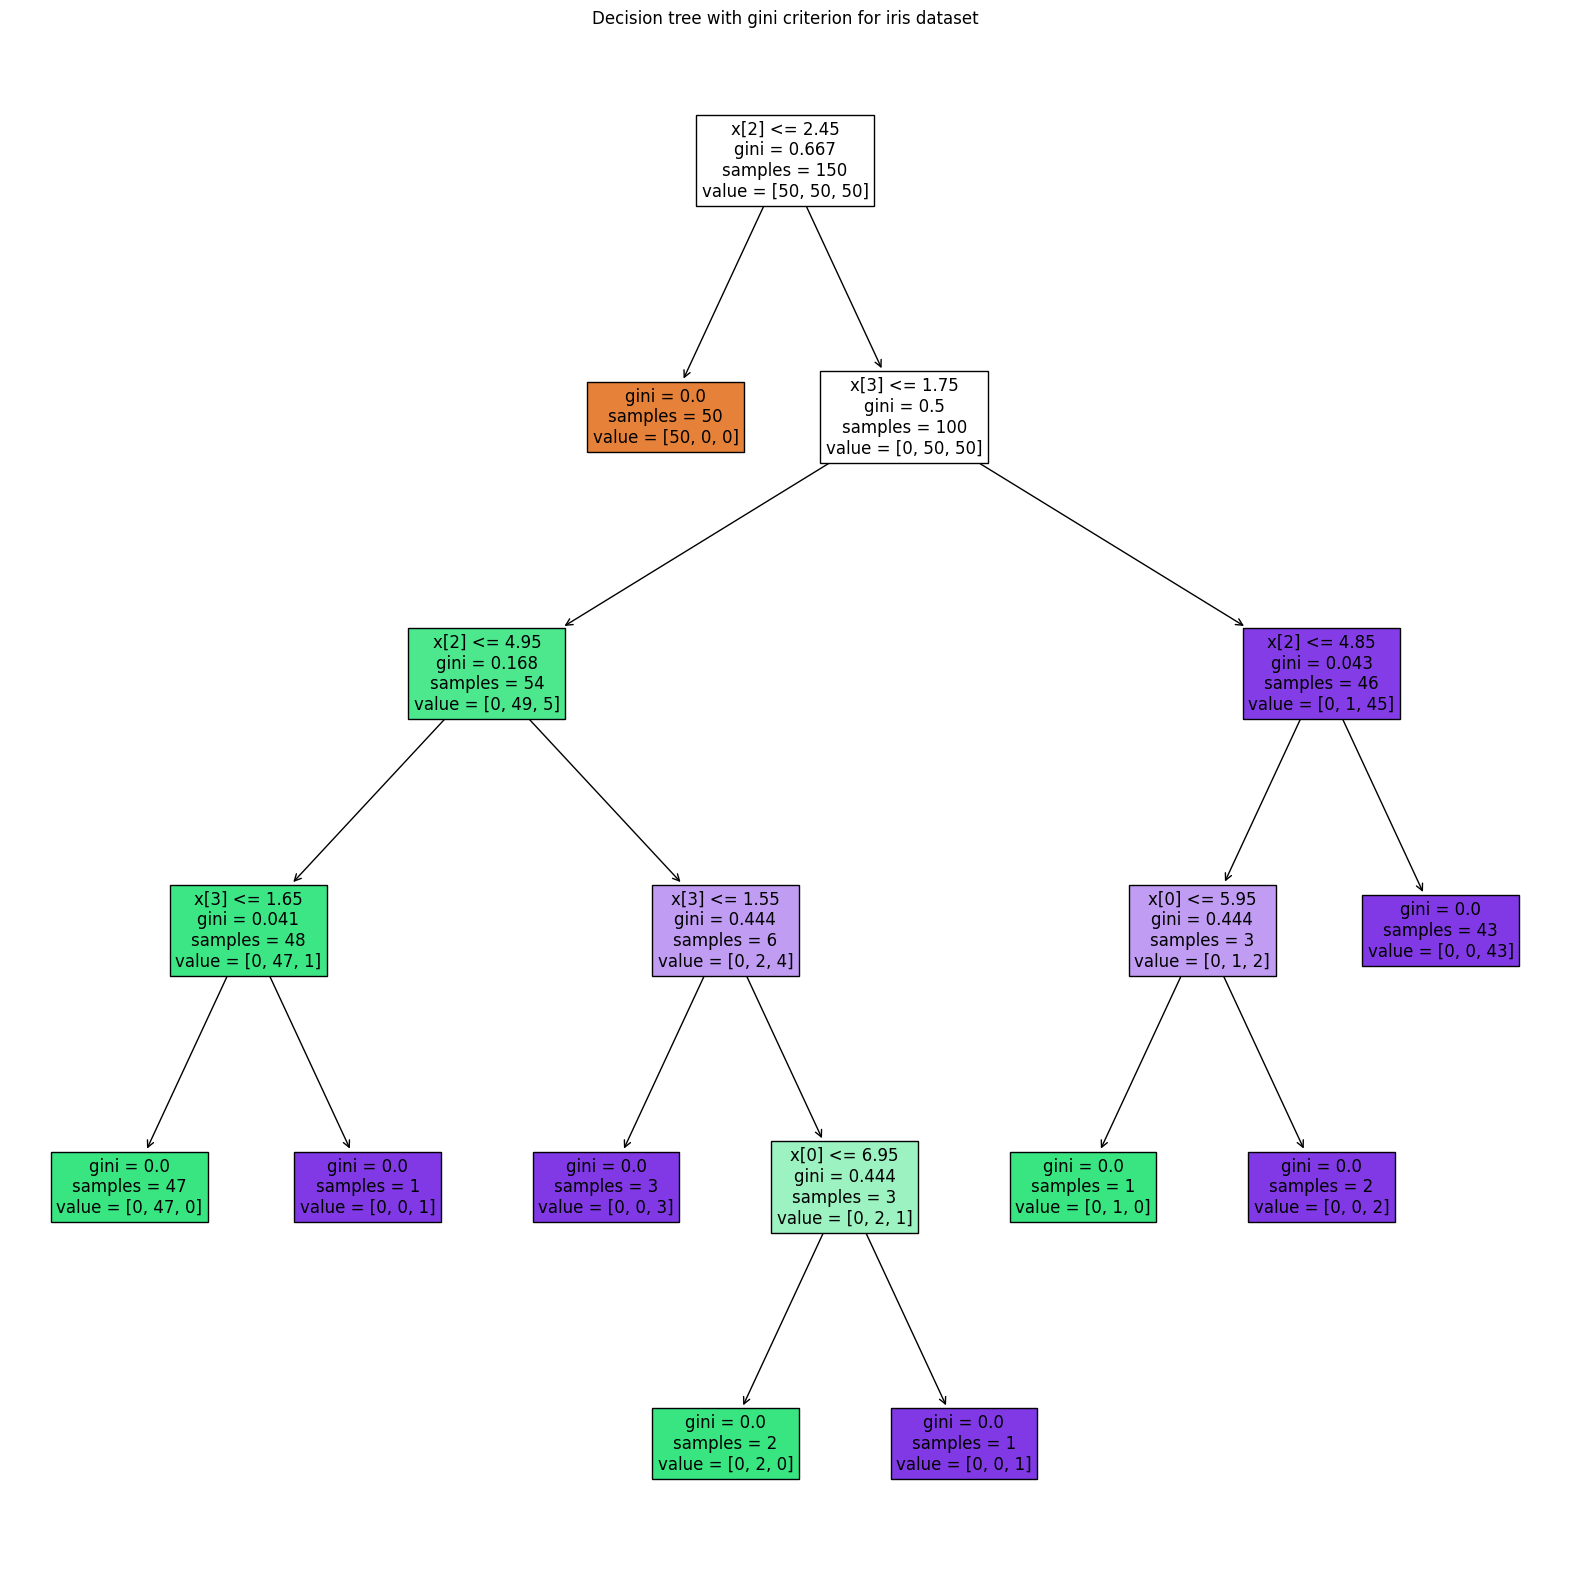

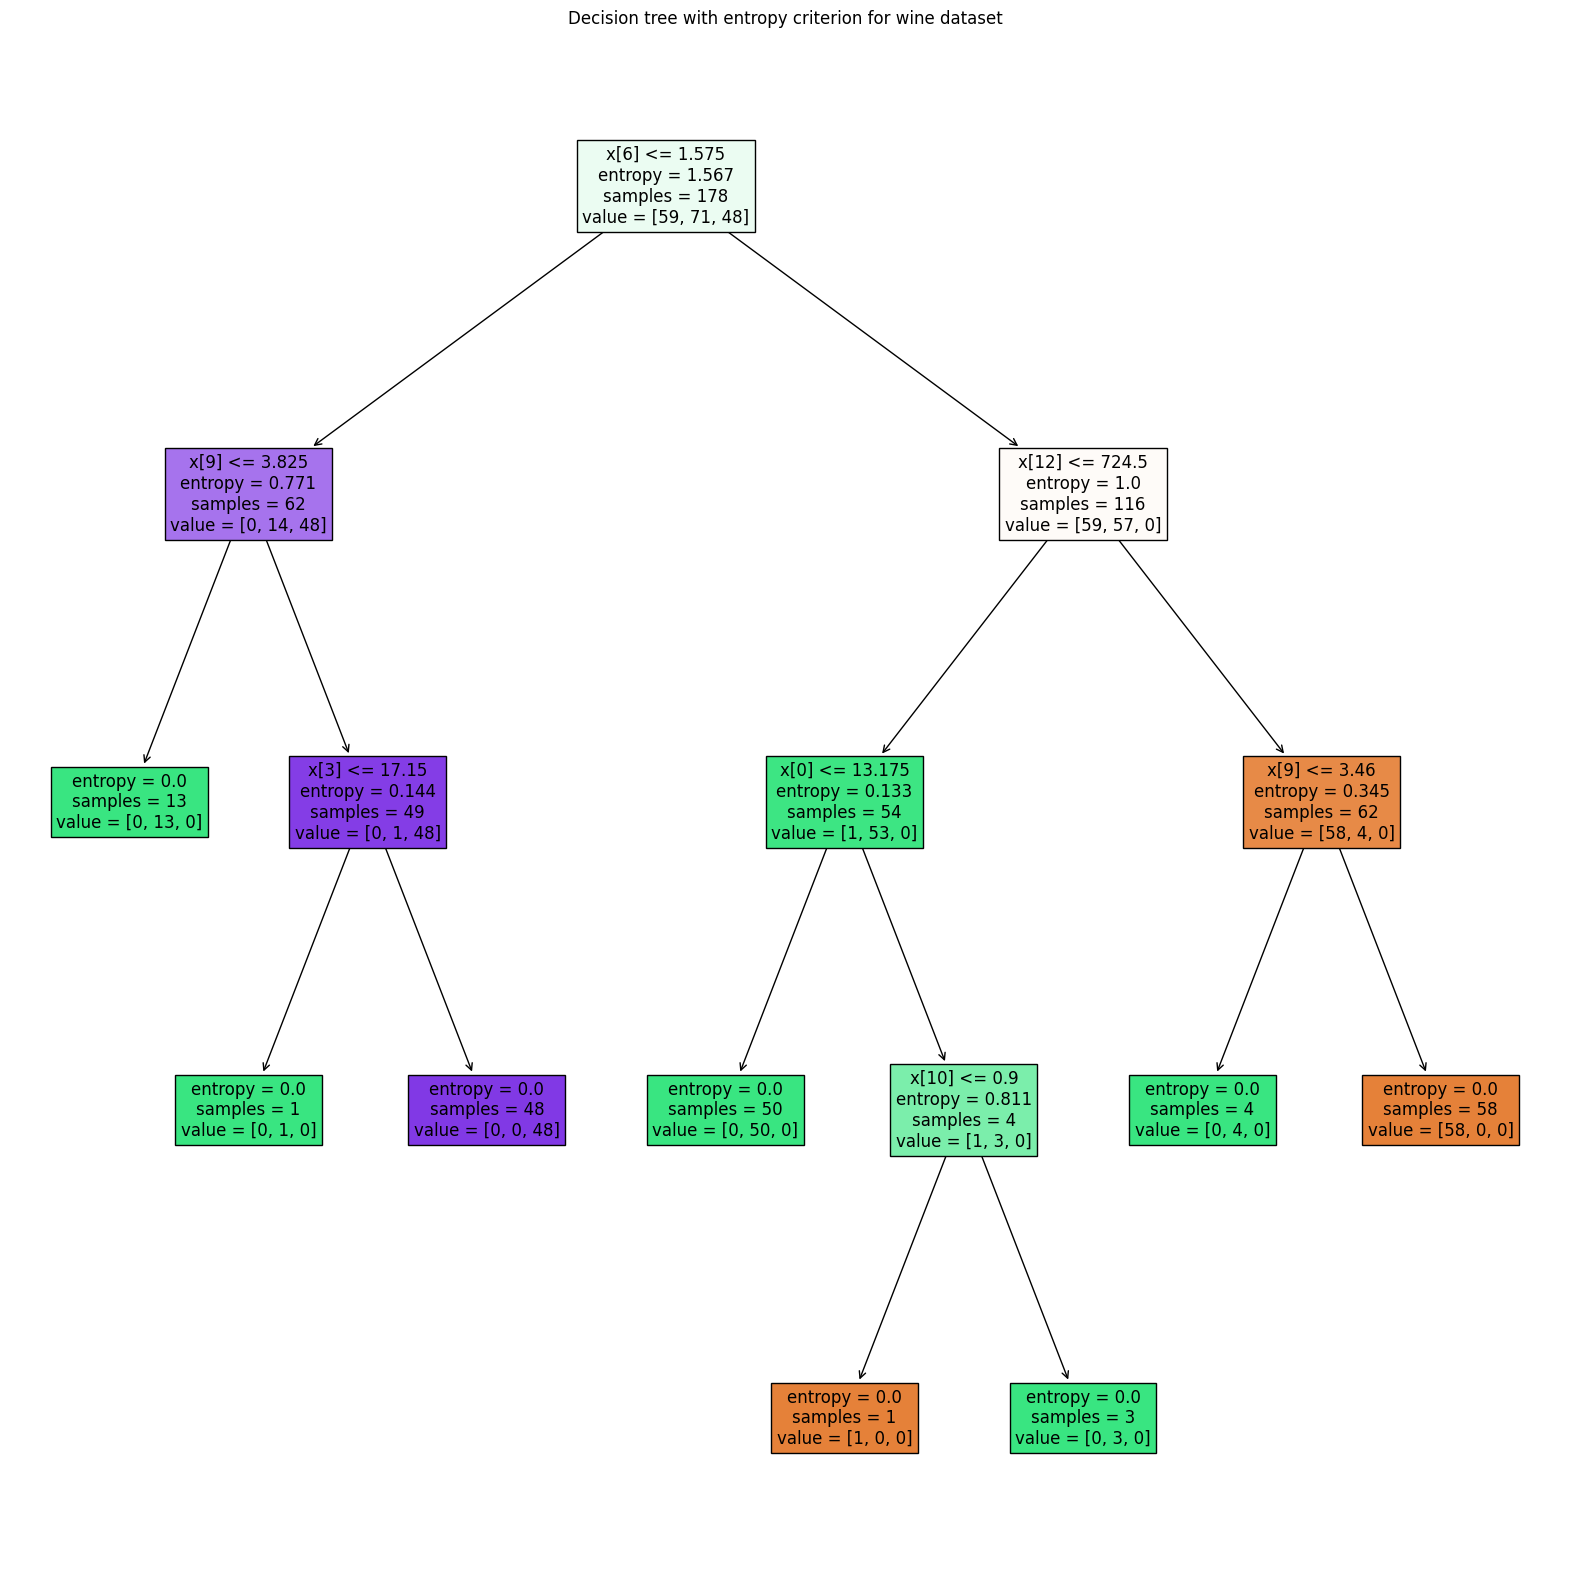

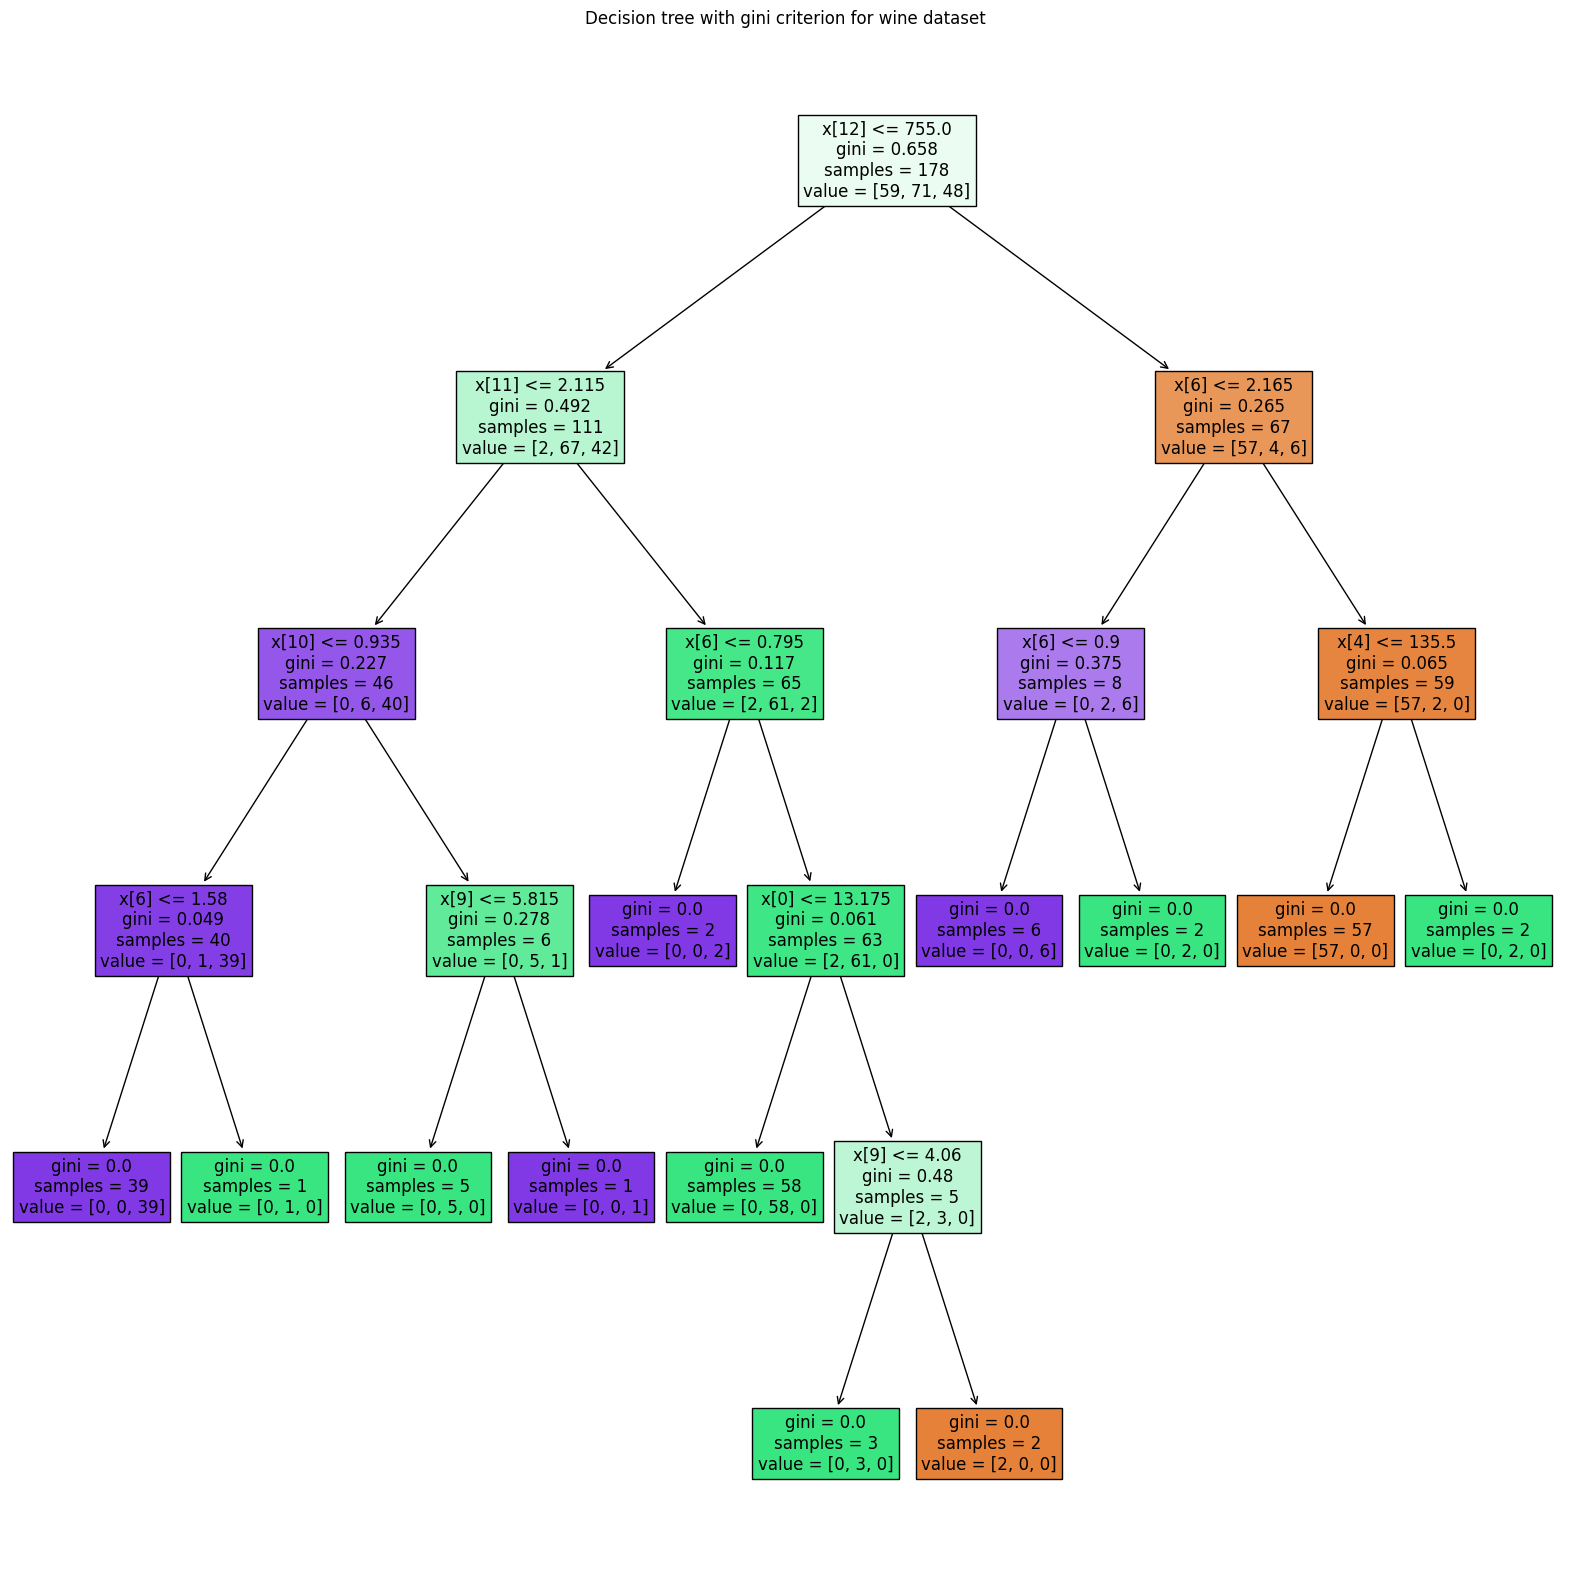

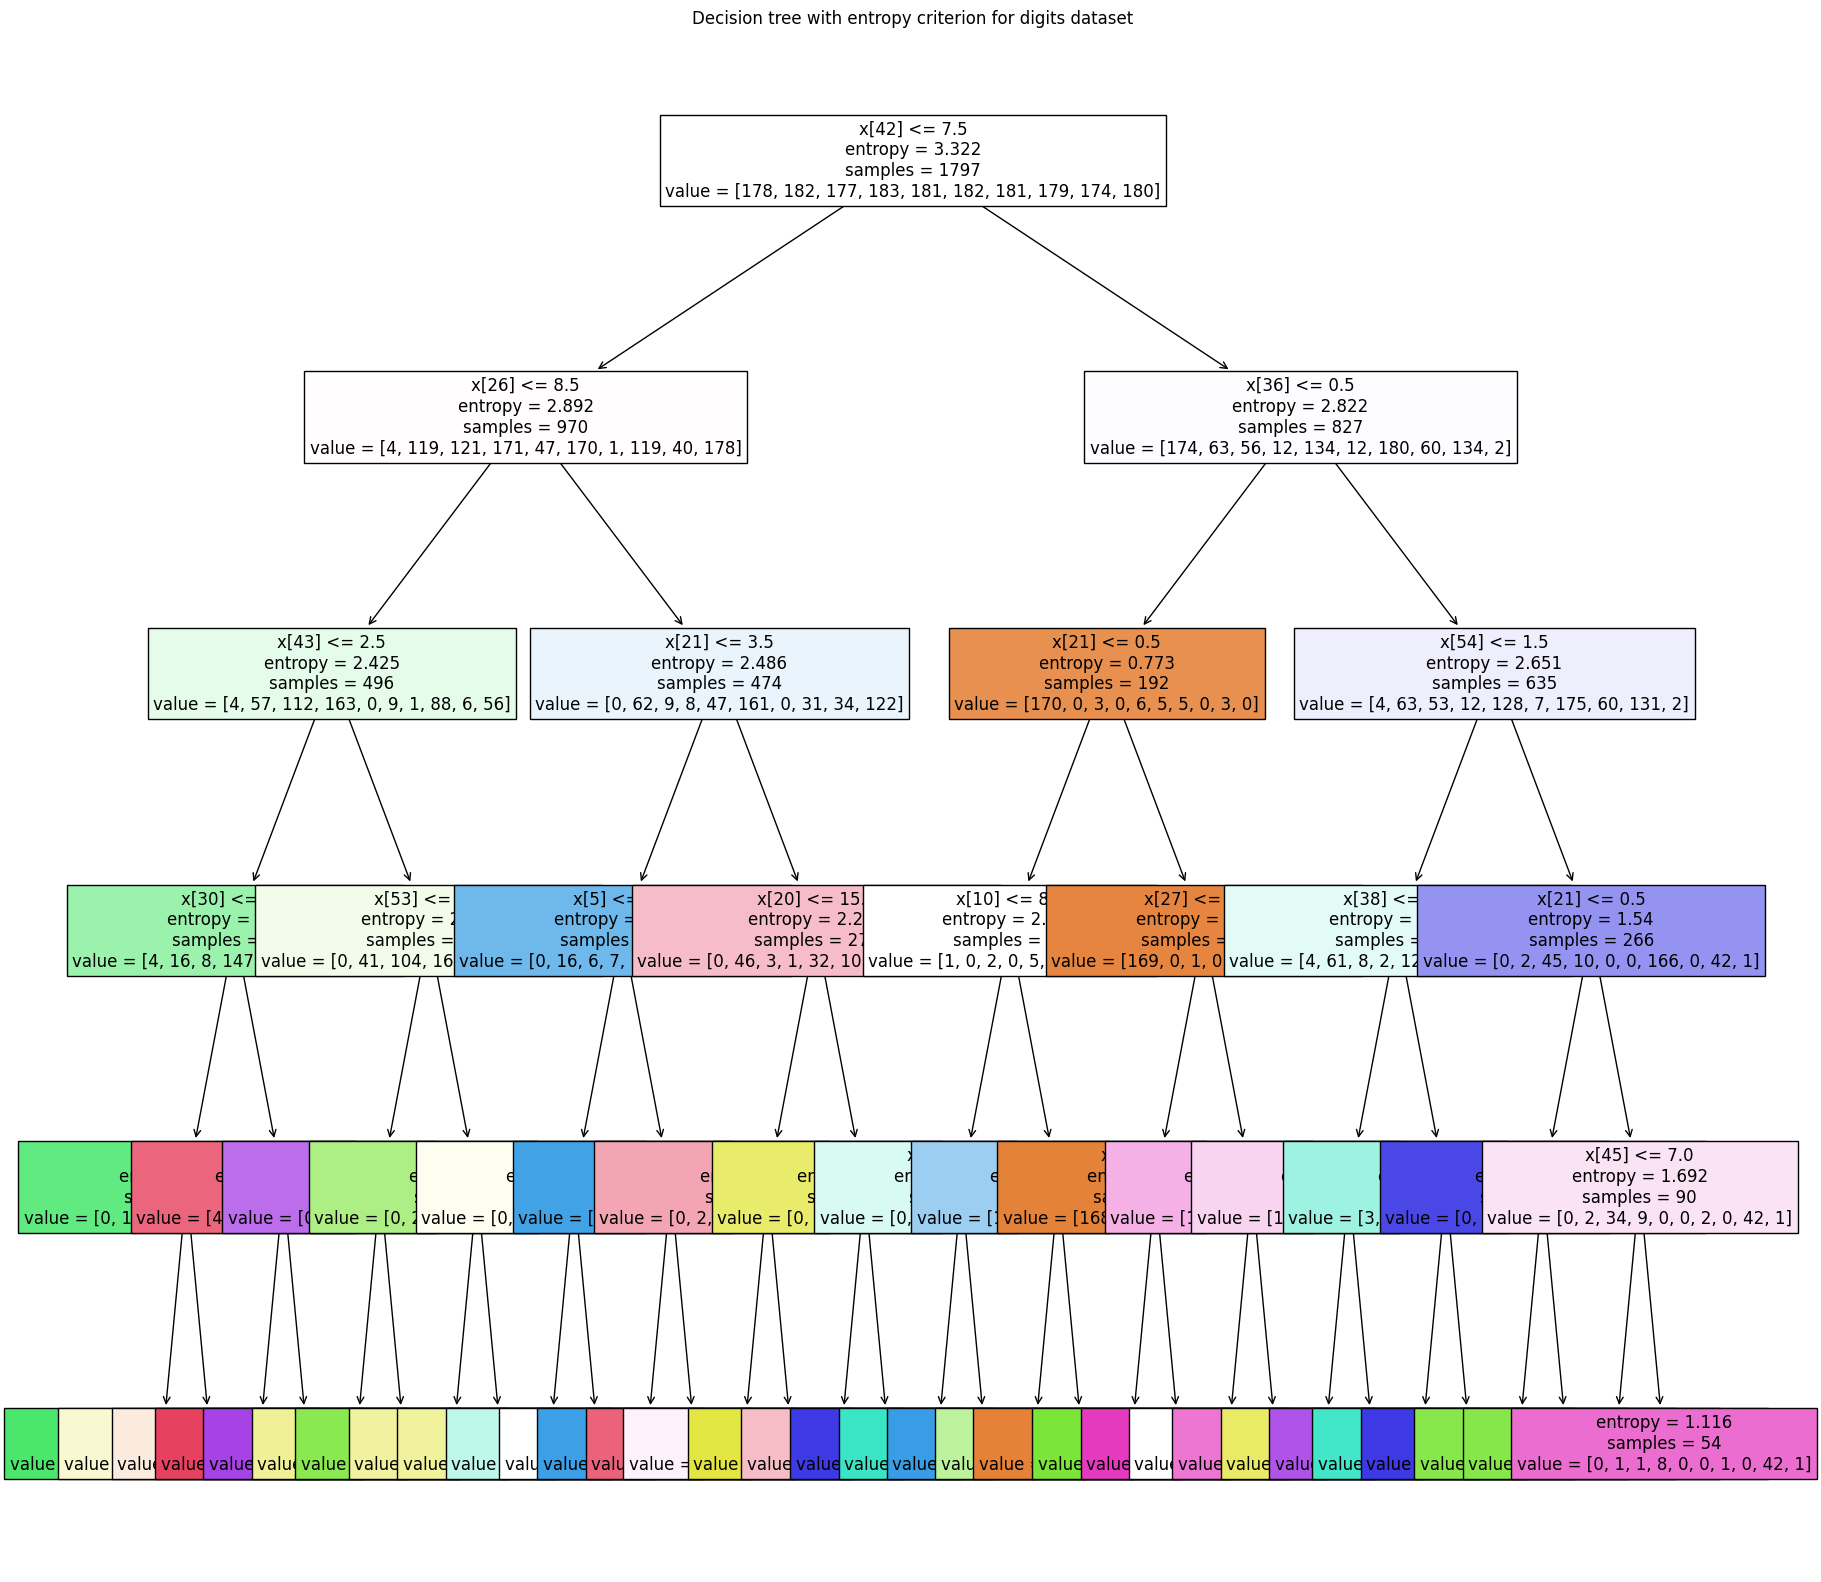

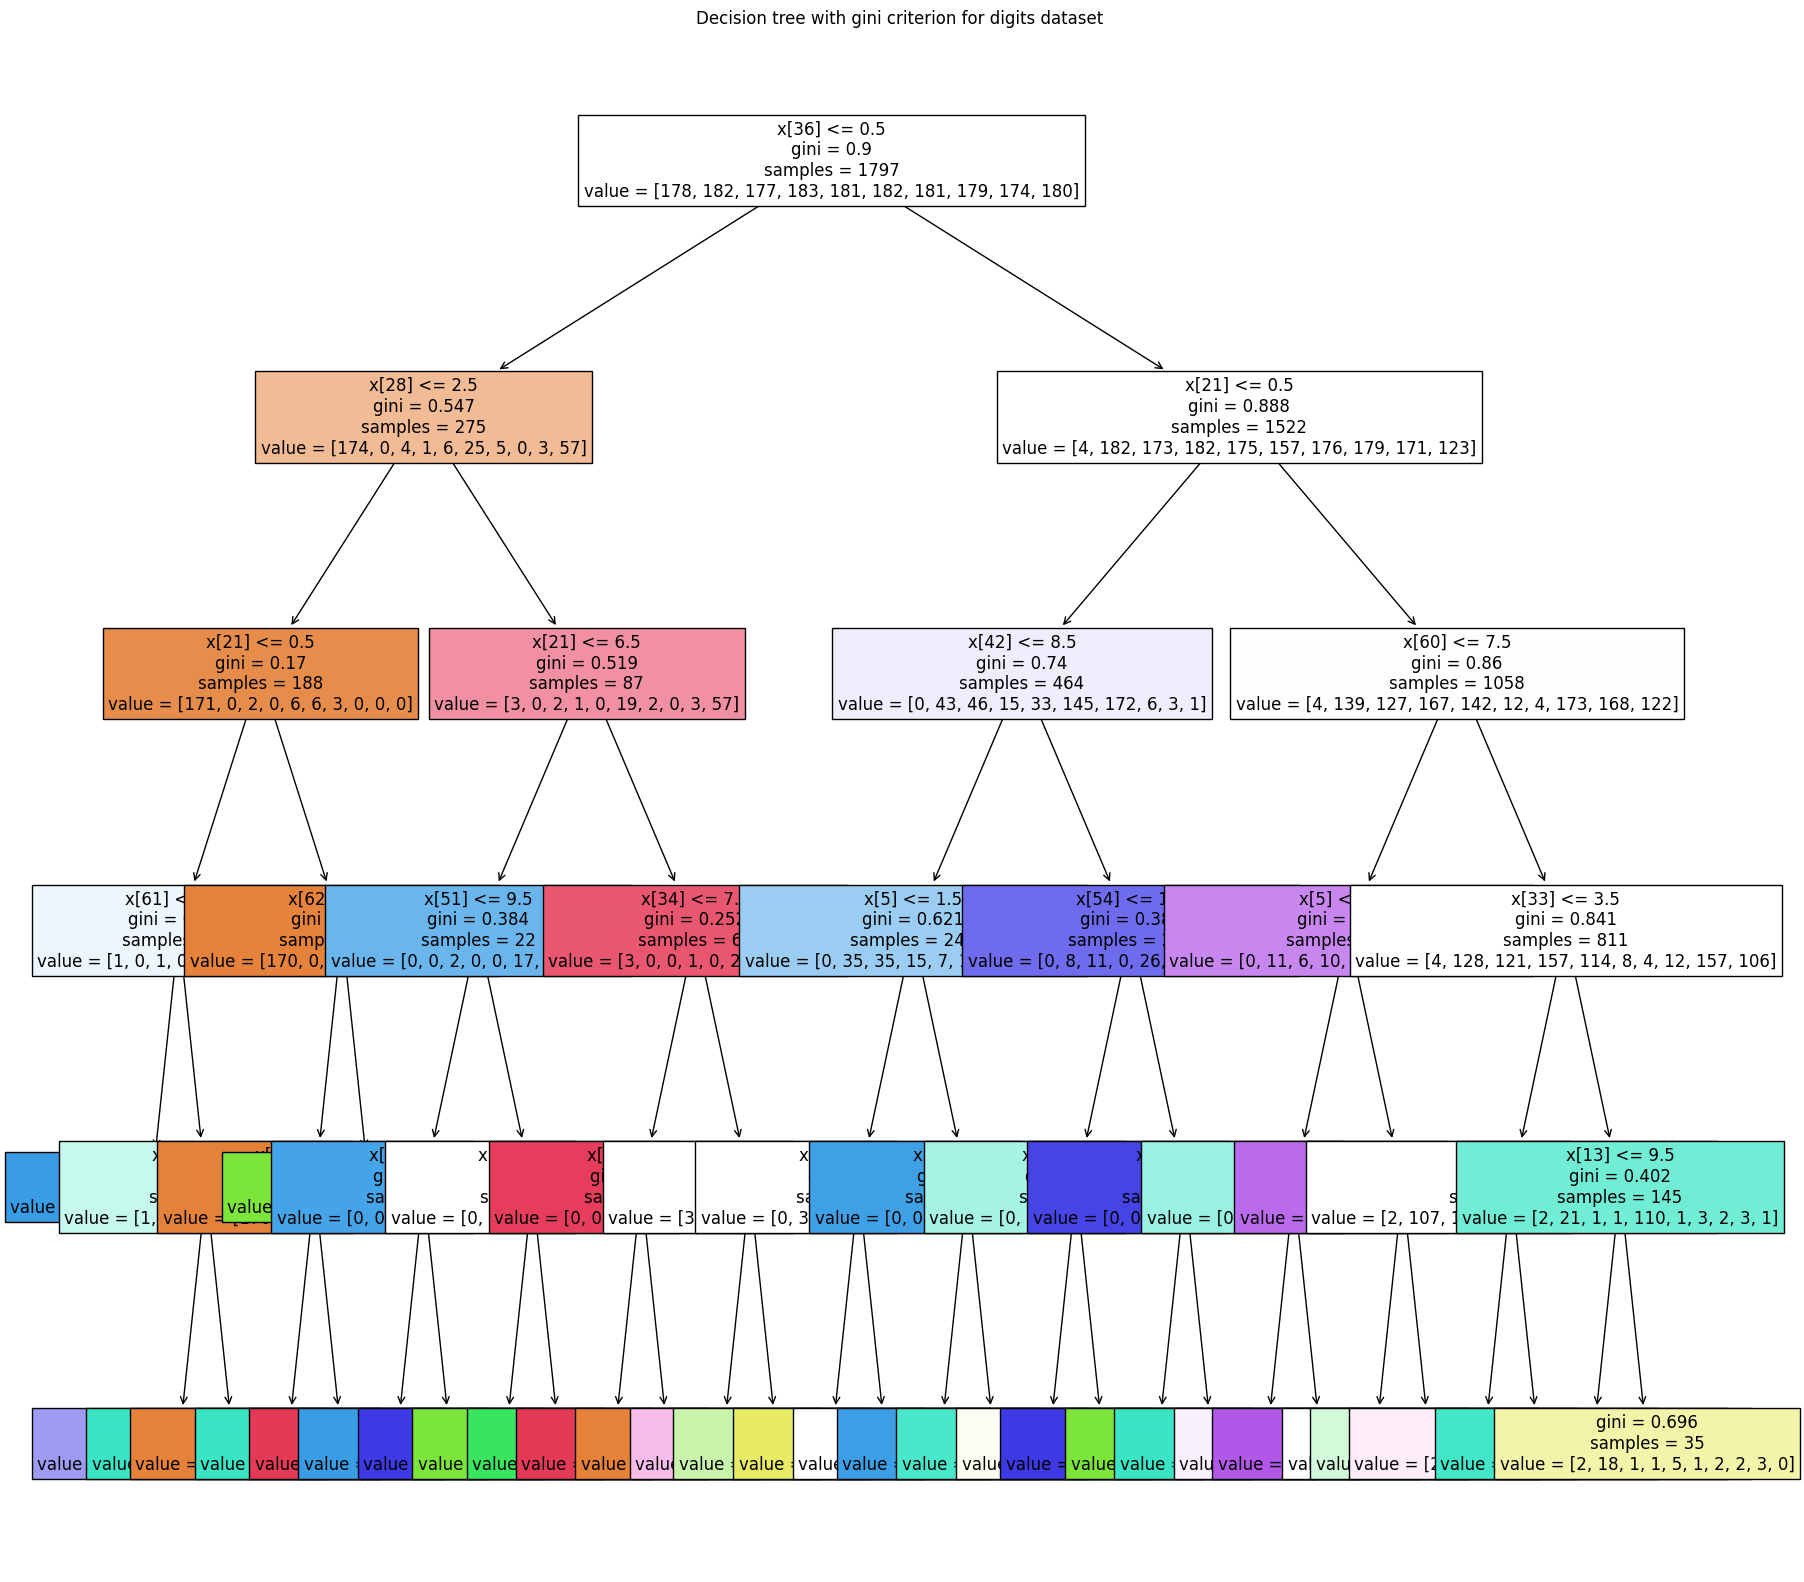

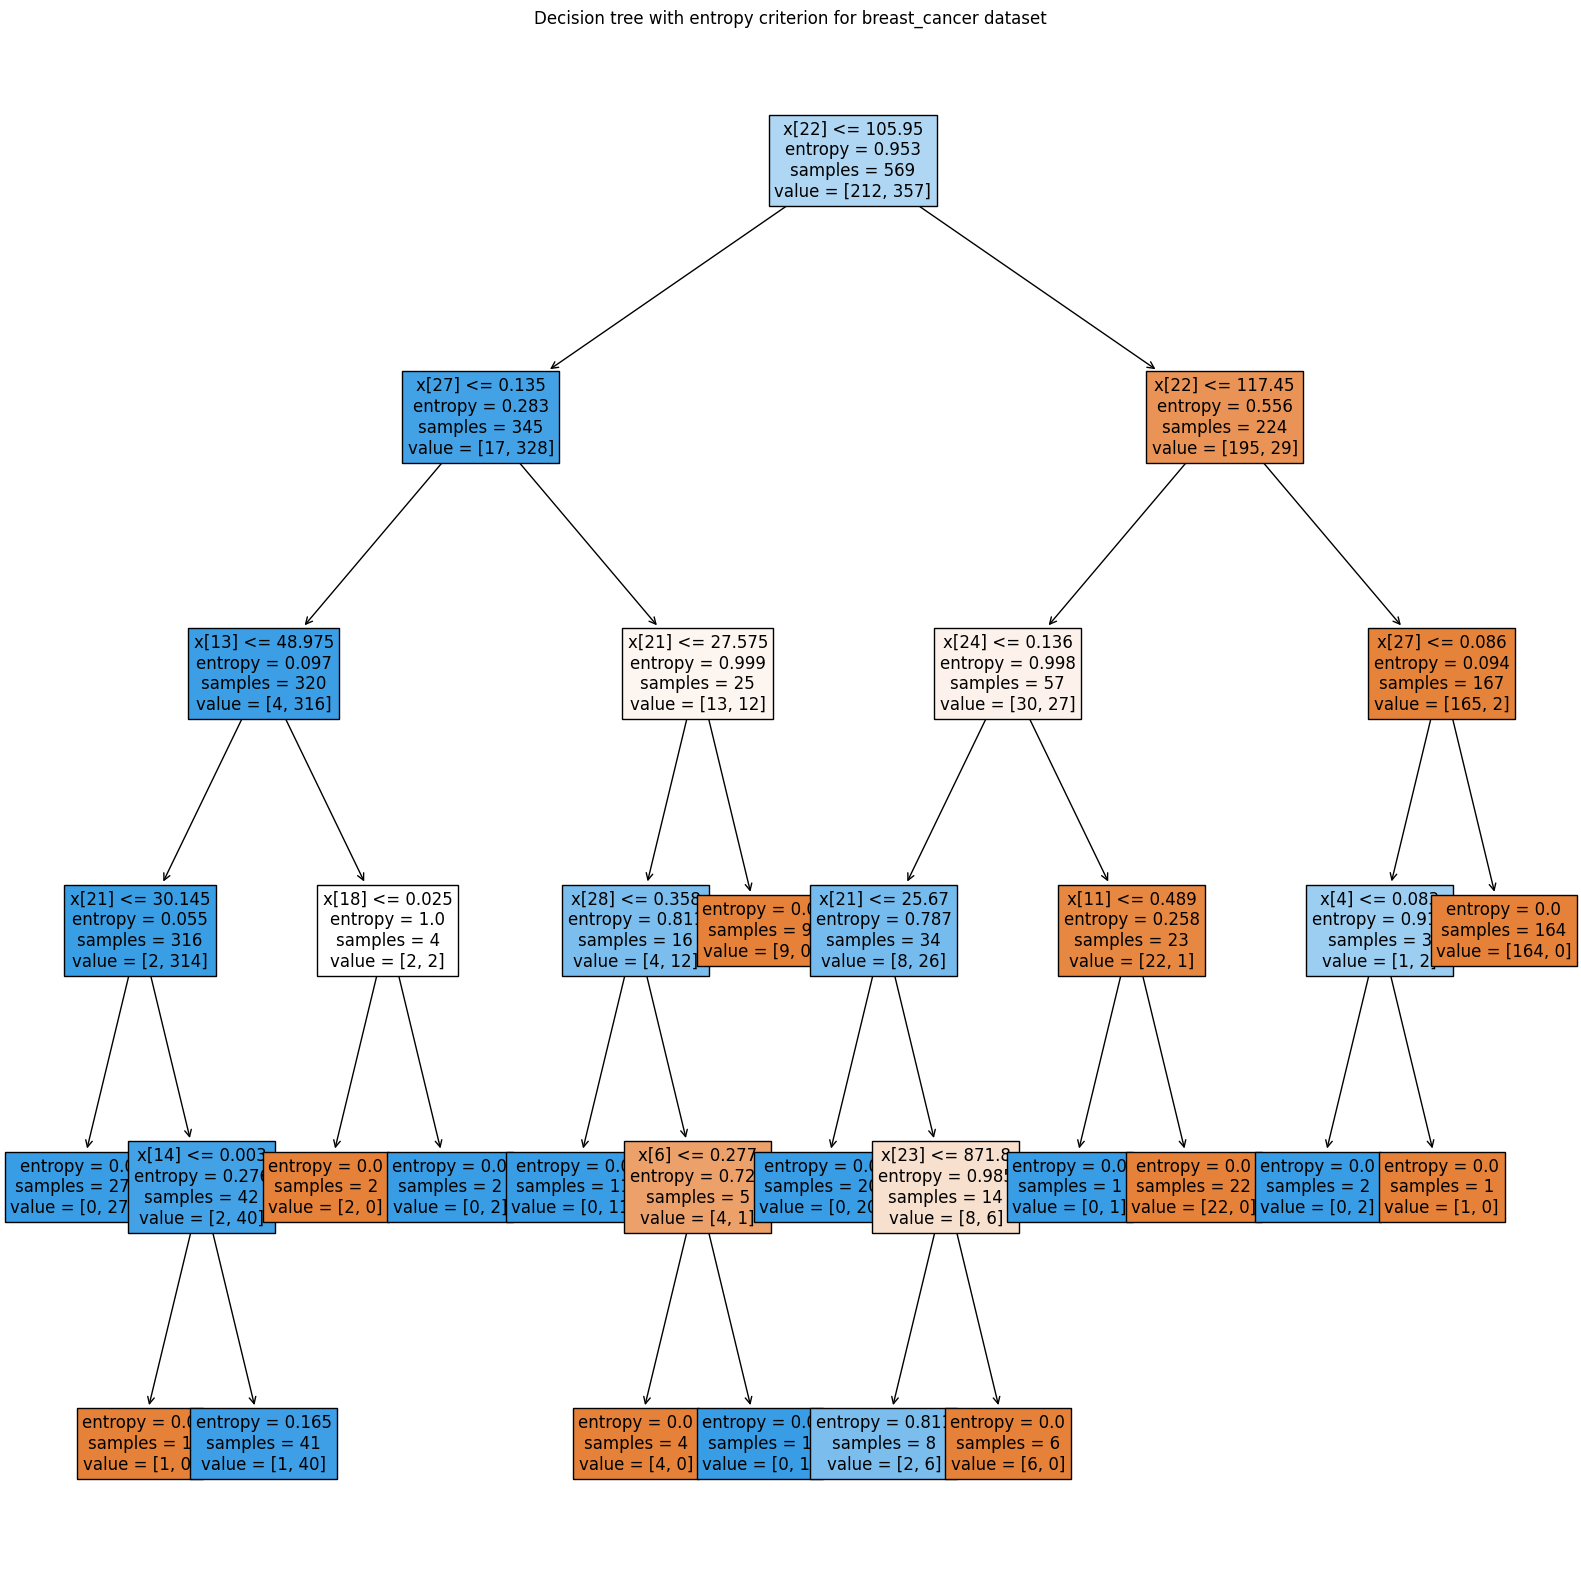

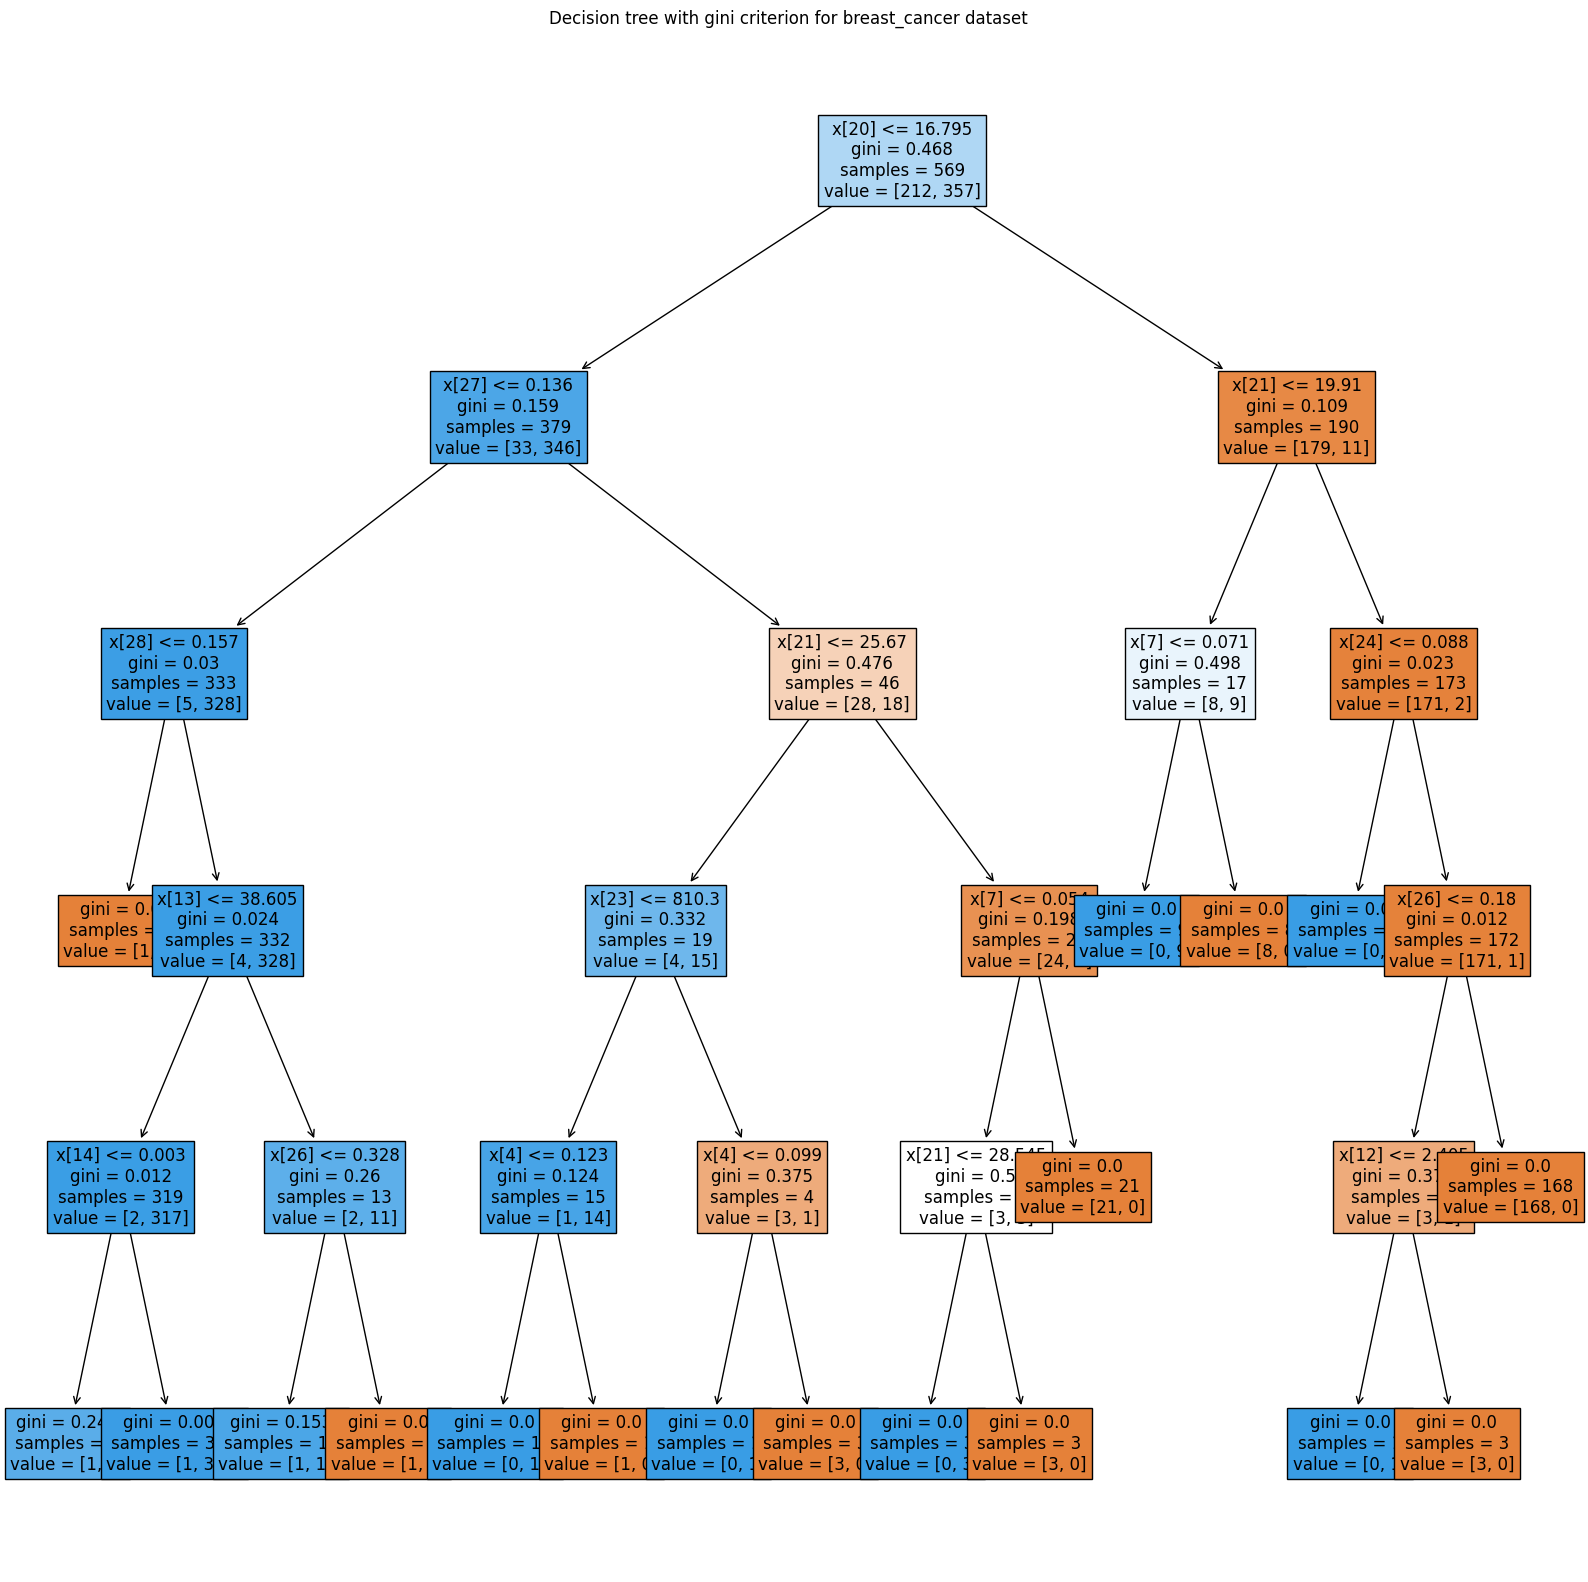

In [4]:
# Iterate the datasets
for name, dataset in datasets.items():
  # Separate X and y
  X = dataset.data
  y = dataset.target

  # Iterate the criterions
  for criterion in criterions:
    # Create a decision tree clasifier
    dt = DecisionTreeClassifier(criterion = criterion, max_depth=5)

    # Train the model
    dt.fit(X, y)

    # Plot the decision tree
    plt.figure(figsize = (20, 20))
    plot_tree(dt, filled = True, fontsize = 12)
    plt.title(f"Decision tree with {criterion} criterion for {name} dataset")
    plt.show()

# It's possible that trees are systematically smaller for one criterion compared
# to the other, but this depends on the data and the problem being solved. In general, 
# entropy tends to produce more balanced trees, while gini tends to produce more 
# compact trees.


Ejercicio 2

Respuesta: Agregar etiquetas a un gráfico mejora la comprensión del mismo, ya que ayuda a identificar qué variables están representadas en cada eje. En consecuencia, es probable que el gráfico con etiquetas sea mejor que el gráfico sin etiquetas para mejorar la comprensión.

Un gráfico con etiquetas que muestra la relación entre min_samples_split_range y max_depth_range proporciona una visualización del desempeño del modelo en diferentes combinaciones de estos hiperparámetros.

El eje X representa el valor de min_samples_split_range, que indica el número mínimo de muestras que se requieren para dividir un nodo interno del árbol de decisión. El eje Y representa el valor de max_depth_range, que limita la profundidad máxima

Cada punto en el gráfico representa una combinación única de min_samples_split_range y max_depth_range, y el color o la intensidad del punto puede indicar el desempeño del modelo en términos de alguna métrica de evaluación, como la precisión o el error de validación cruzada.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def analyze_dt_performances(X, y, scoring):
    # Compute the performance of the default DT configuration using 10-repeated MCCV
    default_dt = DecisionTreeClassifier()
    default_scores = cross_val_score(default_dt, X, y, scoring=scoring, cv=10)
    print("Default DT performance: {:.3f} +/- {:.3f}".format(np.mean(default_scores), np.std(default_scores)))

    # Create a 50x50 grid of possible combinations of values for max_depth and min_samples_split
    max_depth_range = range(1, 51)
    min_samples_split_range = range(2, 52, 2)
    param_grid = {'max_depth': max_depth_range, 'min_samples_split': min_samples_split_range}
    param_grid = np.array(np.meshgrid(*param_grid.values())).T.reshape(-1,2)

    # Compute the DT performance for each combination of max_depth and min_samples_split
    criterion_list = ['entropy', 'gini']
    results = np.zeros((len(criterion_list), len(max_depth_range), len(min_samples_split_range)))
    for i, criterion in enumerate(criterion_list):
        for j, max_depth in enumerate(max_depth_range):
            for k, min_samples_split in enumerate(min_samples_split_range):
                dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
                scores = cross_val_score(dt, X, y, scoring=scoring, cv=10)
                results[i, j, k] = np.mean(scores)

    # Plot the results using a contour plot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    for i, criterion in enumerate(criterion_list):
        ax = axes[0, i]
        ax.set_title('Performance ({})'.format(criterion))
        ax.set_xlabel('min_samples_split')
        ax.set_ylabel('max_depth')
        X_, Y_ = np.meshgrid(min_samples_split_range, max_depth_range)
        cs = ax.contourf(X_, Y_, results[i], cmap='viridis')
        cbar = fig.colorbar(cs, ax=ax)
        cbar.ax.set_ylabel('Performance')

        ax = axes[1, i]
        ax.set_title('Performance change ({})'.format(criterion))
        ax.set_xlabel('min_samples_split')
        ax.set_ylabel('max_depth')
        X_, Y_ = np.meshgrid(min_samples_split_range, max_depth_range)
        cs = ax.contourf(X_, Y_, results[i] - np.mean(default_scores), cmap='coolwarm', center=0)
        cbar = fig.colorbar(cs, ax=ax)
        cbar.ax.set_ylabel('Performance change')

    plt.tight_layout()
    plt.show()

Iris
Default DT performance: 0.960 +/- 0.044


C:\Users\Ap-ga\AppData\Local\Temp\ipykernel_36804\1609836542.py:40: UserWarning: The following kwargs were not used by contour: 'center'
  cs = ax.contourf(X_, Y_, results[i] - np.mean(default_scores), cmap='coolwarm', center=0)


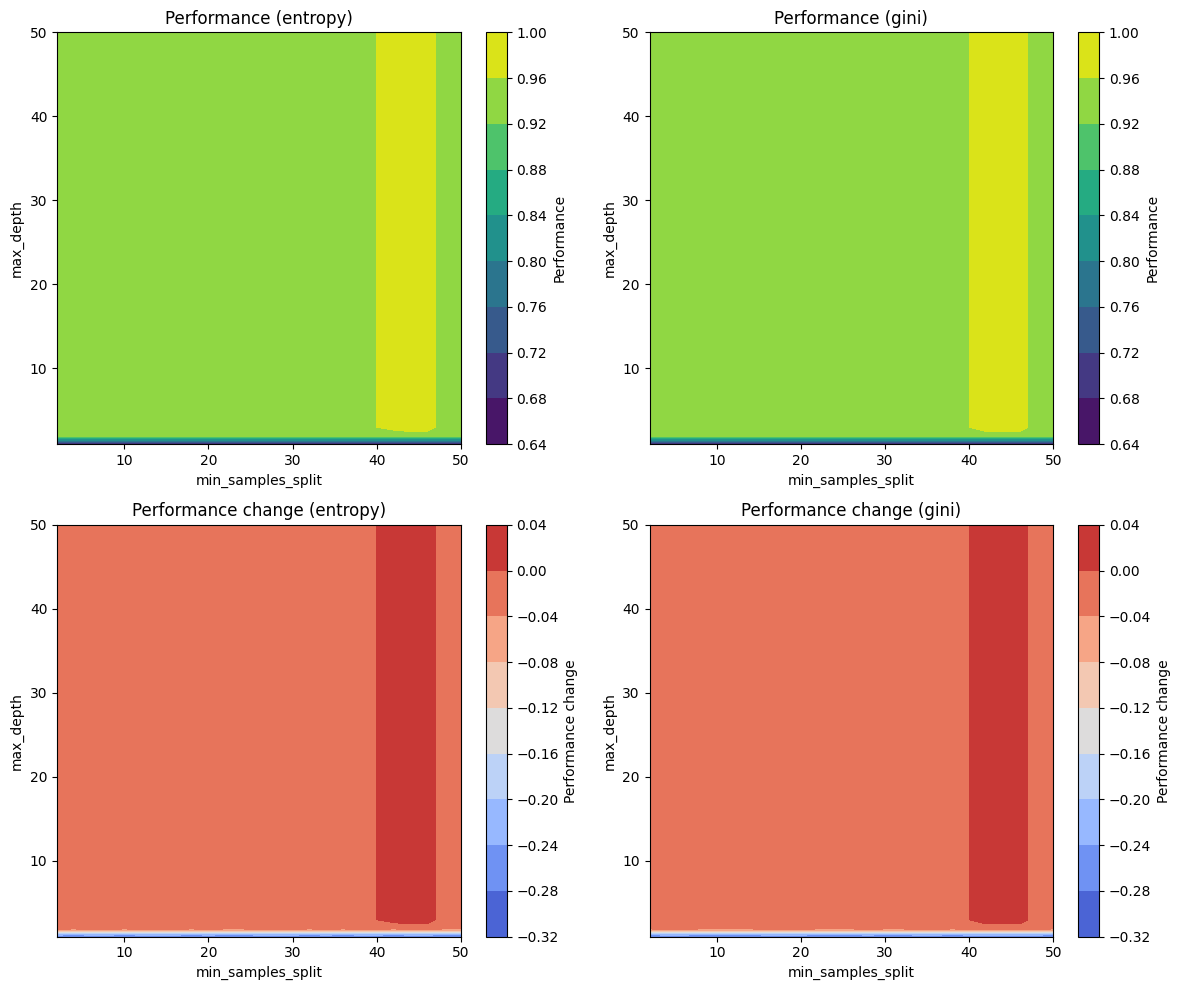

Wine
Default DT performance: 0.865 +/- 0.077


C:\Users\Ap-ga\AppData\Local\Temp\ipykernel_36804\1609836542.py:40: UserWarning: The following kwargs were not used by contour: 'center'
  cs = ax.contourf(X_, Y_, results[i] - np.mean(default_scores), cmap='coolwarm', center=0)


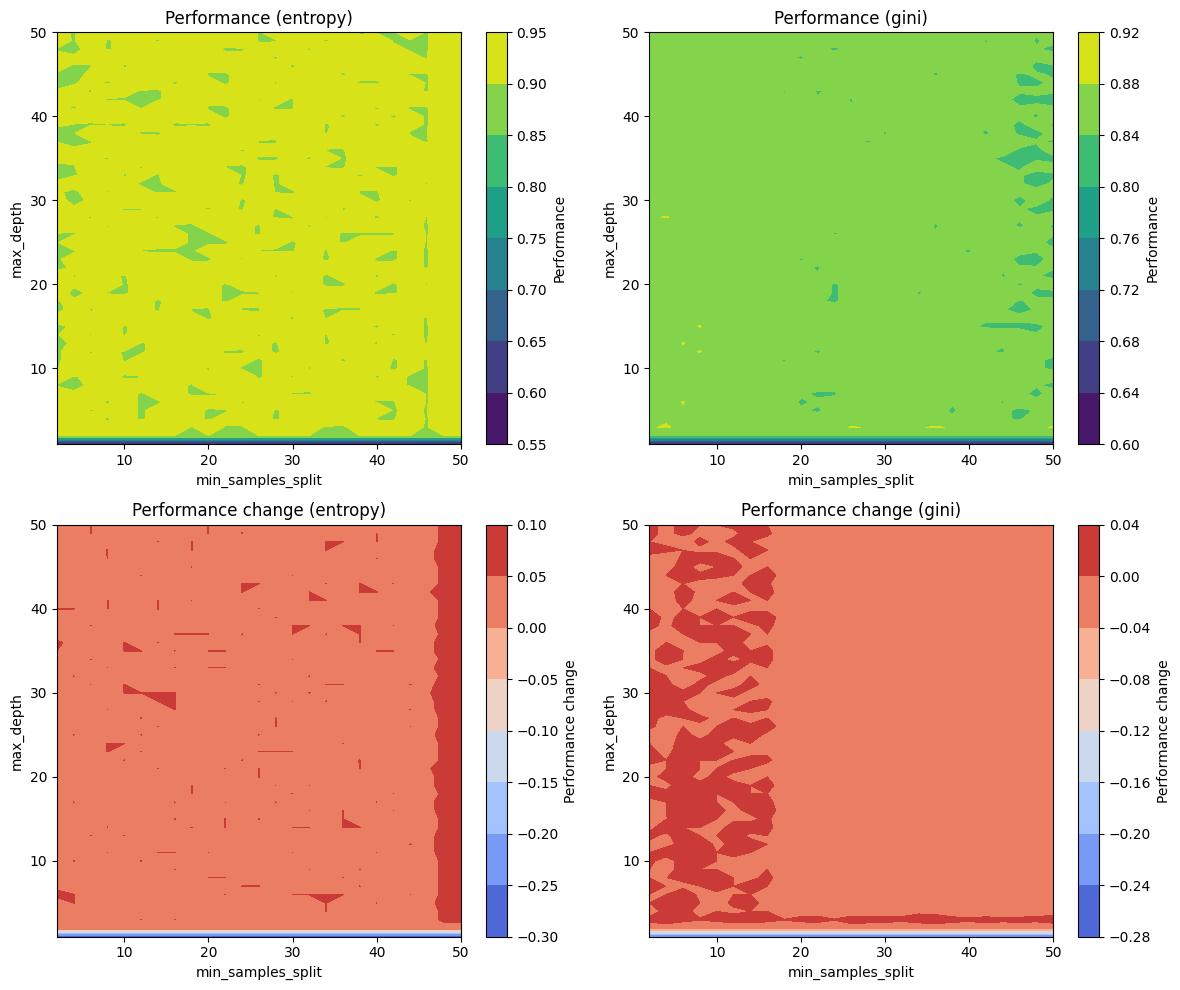

Digits
Default DT performance: 0.822 +/- 0.036


C:\Users\Ap-ga\AppData\Local\Temp\ipykernel_36804\1609836542.py:40: UserWarning: The following kwargs were not used by contour: 'center'
  cs = ax.contourf(X_, Y_, results[i] - np.mean(default_scores), cmap='coolwarm', center=0)


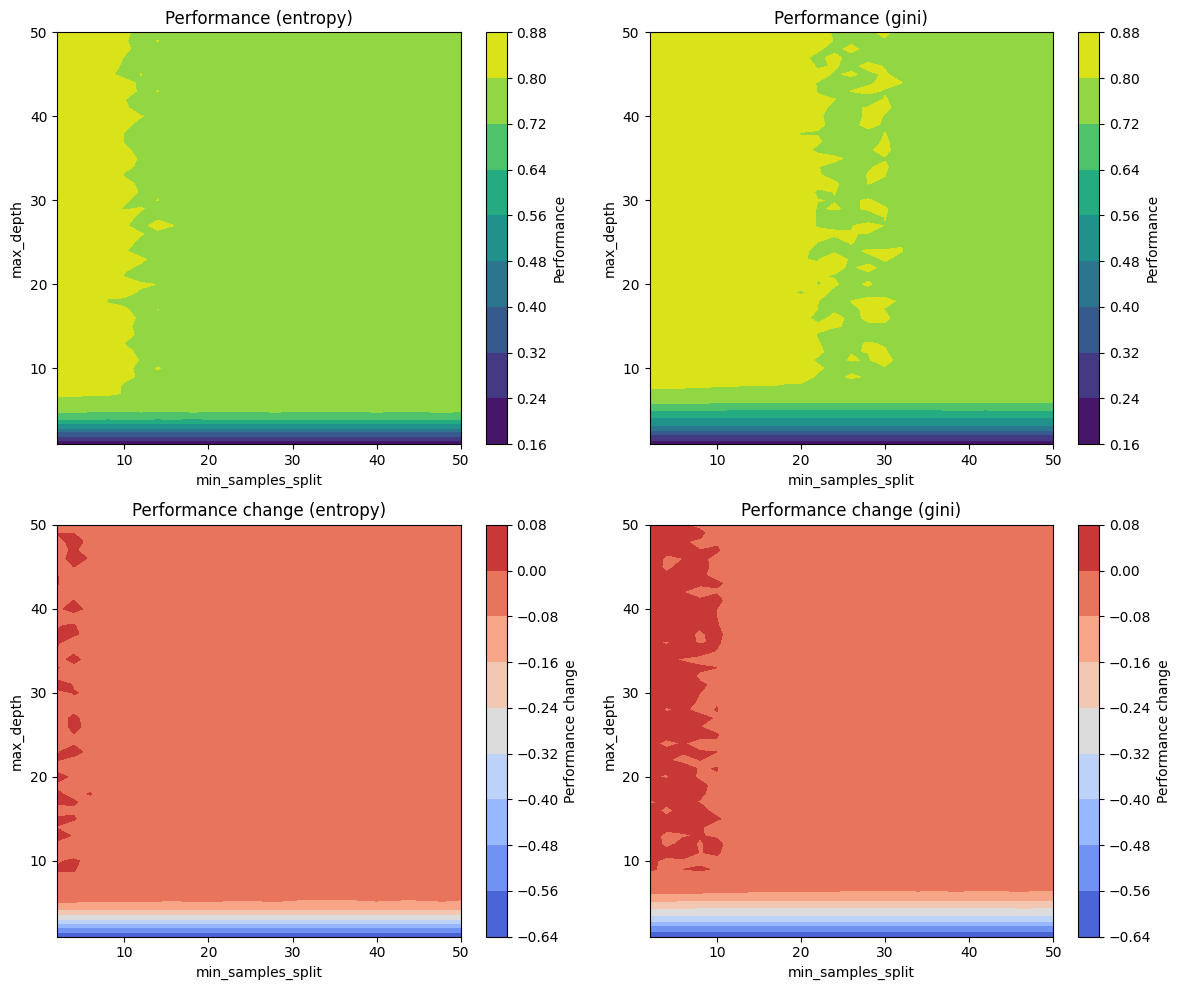

Breast Cancer
Default DT performance: 0.916 +/- 0.034


C:\Users\Ap-ga\AppData\Local\Temp\ipykernel_36804\1609836542.py:40: UserWarning: The following kwargs were not used by contour: 'center'
  cs = ax.contourf(X_, Y_, results[i] - np.mean(default_scores), cmap='coolwarm', center=0)


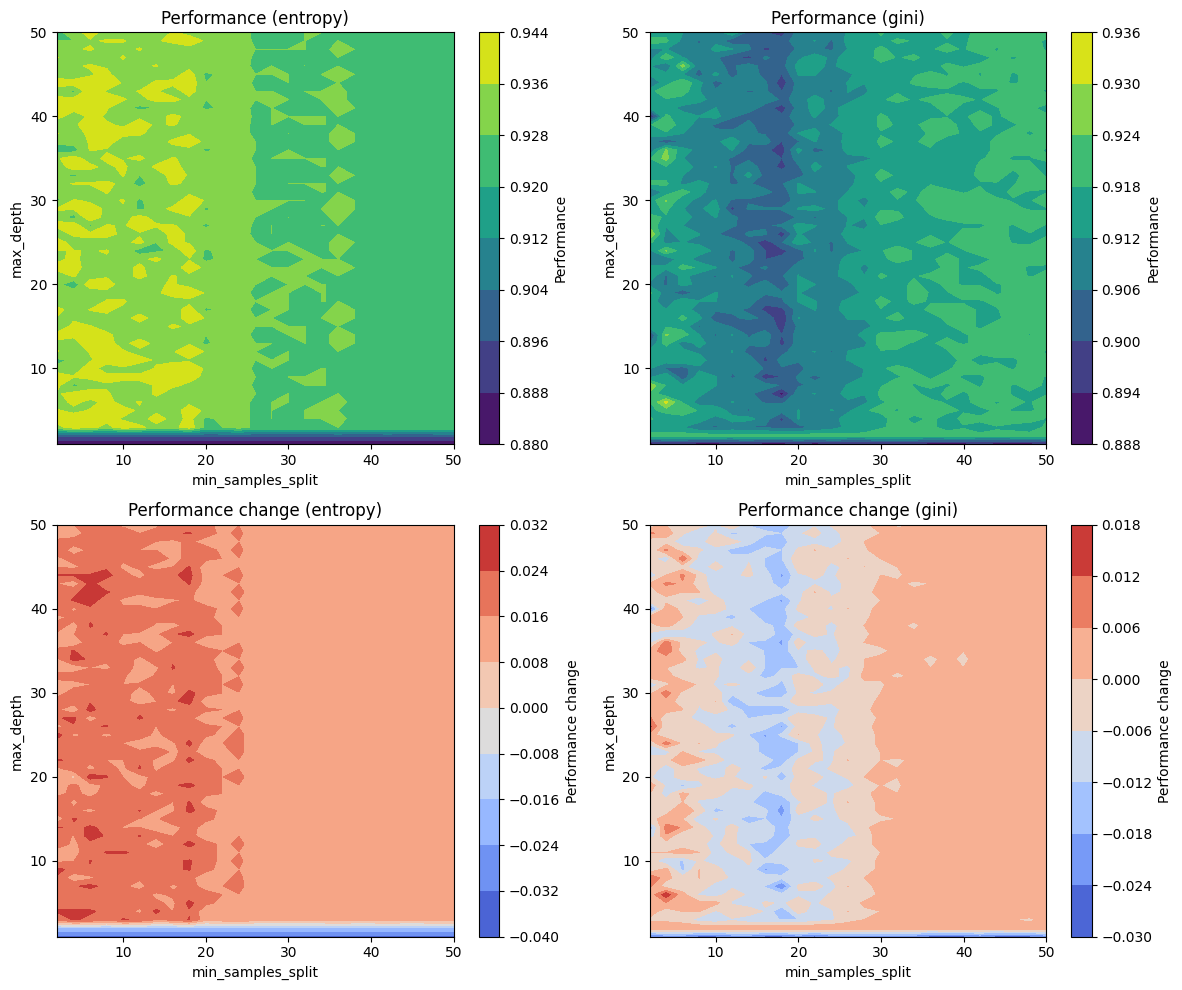

In [13]:
from sklearn.datasets import load_iris, load_wine, load_digits, load_breast_cancer

iris = load_iris()
wine = load_wine()
digits = load_digits()
breast_cancer = load_breast_cancer()

X_list = [iris.data, wine.data, digits.data, breast_cancer.data]
y_list = [iris.target, wine.target, digits.target, breast_cancer.target]
dataset_names = ['Iris', 'Wine', 'Digits', 'Breast Cancer']

for X, y, name in zip(X_list, y_list, dataset_names):
    print(name)
    analyze_dt_performances(X, y, scoring='accuracy')


Ejercicio 3

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine, load_digits, load_breast_cancer, load_diabetes
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

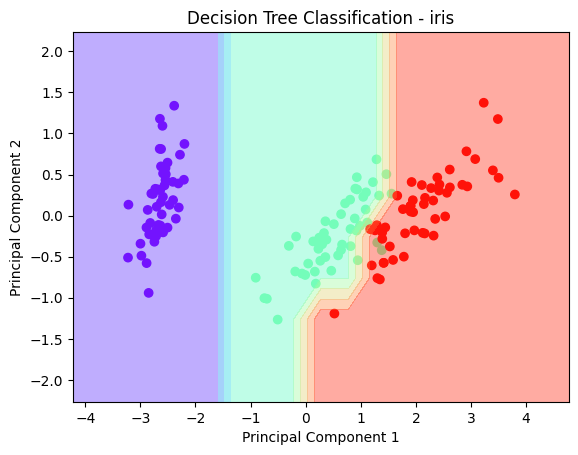

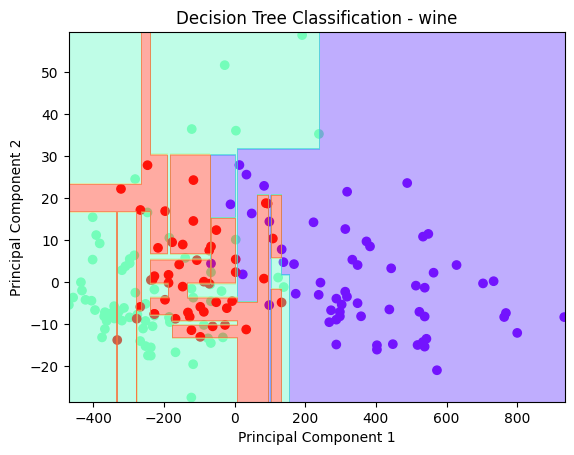

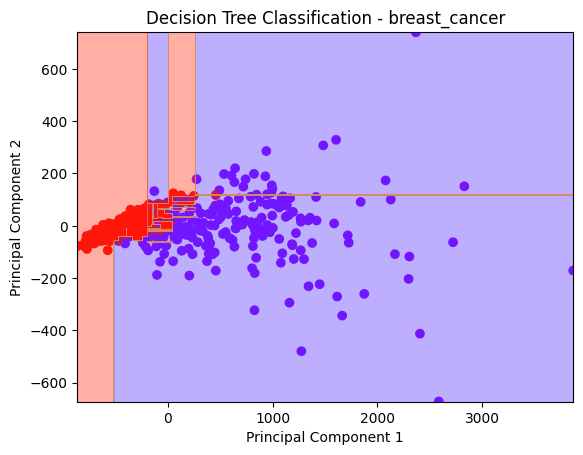

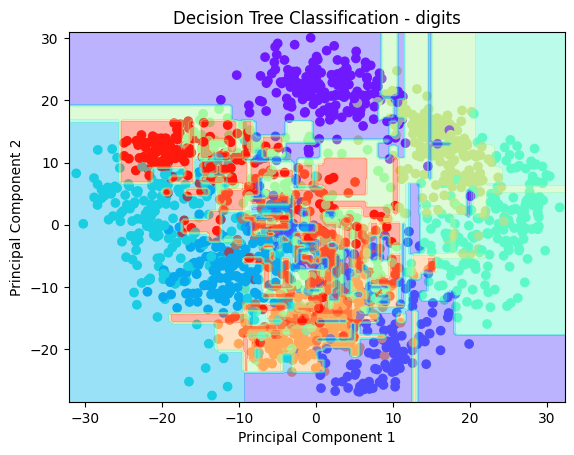

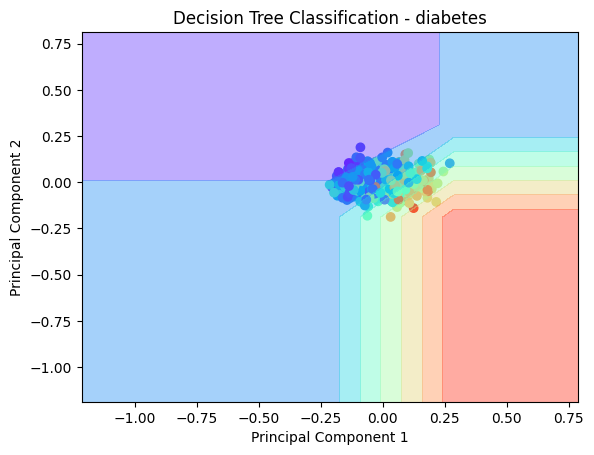

In [8]:
def visualize_dt_behavior(X, y, dataset_name):
    # Determine if regression or classification problem
    if len(np.unique(y)) >= 15 and np.issubdtype(y.dtype, np.number):
        # Regression problem
        model = DecisionTreeRegressor()
        cmap = 'rainbow'
    else:
        # Classification problem
        model = DecisionTreeClassifier()
        cmap = 'rainbow'

    # Perform PCA and reduce to 2 dimensions
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Train decision tree on reduced data
    model.fit(X_reduced, y)

    # Scatter points into a figure
    fig, ax = plt.subplots()
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=cmap)

    # Use contourf to show decision surface
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

    # Set plot title and axis labels
    if cmap == 'raimbow':
        ax.set_title(f"Decision Tree Classification - {dataset_name}")
    else:
        ax.set_title(f"Decision Tree Classification - {dataset_name}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    plt.show()

# Test the function on the five datasets
iris = load_iris()
wine = load_wine()
breast_cancer = load_breast_cancer()
digits = load_digits()
diabetes = load_diabetes()

visualize_dt_behavior(iris.data, iris.target, "iris")
visualize_dt_behavior(wine.data, wine.target, "wine")
visualize_dt_behavior(breast_cancer.data, breast_cancer.target, "breast_cancer")
visualize_dt_behavior(digits.data, digits.target, "digits")
visualize_dt_behavior(diabetes.data, diabetes.target, "diabetes")